In [1]:
#canopy height inside a meadow in august
from netCDF4 import Dataset
import numpy as  np
import matplotlib.pyplot as plt
from datetime import datetime

import math
import glob
import os.path
import sys
sys.path.insert(0, '/home/g/g260204/tools/python_skripts/SchismUtils/')
from schism_utils import read_data, sort_files
import h5py
import os.path

from matplotlib import rcParams
rcParams['figure.dpi'] = 300

import matplotlib as mpl
mpl.rc('hatch', color='k', linewidth=1)

In [2]:
study = 'srm024_2010'
figname = 'srm024_2010'
mon = 4
mon_str= 'april'
run_labels=['no sg','stat sg','stat sg + rs','var sg','var sg +rs','var sg + w']
colors = ['tab:blue','tab:orange','wheat','tab:green','lightgreen','darkgreen']
plotpat = '/work/gg0877/g260204/sim_data/SR5yr/plots/plots/' 
simpat = '/work/gg0877/g260204/sim_data/SR5yr/'

outpath = '/work/gg0877/g260204/sim_data/SR5yr/plots/plots/' + study + '/'

if not os.path.exists(outpath):
    os.makedirs(outpath)

In [3]:
#seagras meadows
import geopandas as gpd
sg_de_pat = '/work/gg0877/g260204/sim_data/SyltRomo/01_preprog/100m2014/seegrass_2014_DE.shp'
sg_dk_pat = '/work/gg0877/g260204/sim_data/SyltRomo/01_preprog/100m2014/seegrass_2014_DK.shp'
shp_pat =  '/work/gg0877/g260204/sim_data/SyltRomo/01_preprog/100m/syltromo_silhouette.shp'
sg_de = gpd.read_file(sg_de_pat)
sg_dk = gpd.read_file(sg_dk_pat)
sg_de = sg_de.to_crs("EPSG:4326")
sg_dk = sg_dk.to_crs("EPSG:4326")
sg_de = sg_de.cx[:,54.885:]
sg_dk = sg_dk.cx[:,:55.14]
#    sg_de.boundary.plot(ax=plt.gca(),color='red',linewidth=0.5)
#    sg_dk.boundary.plot(ax=plt.gca(),color='red',linewidth=0.5)

#### split danish seagrass into subsections
sg_havn = sg_dk[sg_dk['Område']=='Havneby Nord']
sg_havs = sg_dk[sg_dk['Område']=='Havneby Syd']
sg_kold = sg_dk[sg_dk['Område']=='Koldby']
sg_ball = sg_dk[sg_dk['Område']=='Ballum']
sg_jord = sg_dk[sg_dk['Område']=='Jordsand']

#split german seagrass into subsections
sg_rick = sg_de[3:9]
sg_hind = sg_de[9:13]
sg_mors = sg_de[13:15]
sg_keit = sg_de[15:24]
sg_kamp = sg_de.iloc[[2,24]]
sg_koen = sg_de.iloc[[0,1,25,26]]

import shapely
#find center point of meadow
def center(geo):
    bnd = geo.geometry.total_bounds
    #print(bnd[2]-bnd[0], bnd[3]-bnd[1])
    return [(bnd[2]+bnd[0])/2 ,(bnd[1]+bnd[3])/2]

c_havn = center(sg_havn)
c_havs = center(sg_havs)
c_kold = center(sg_kold)
c_ball = center(sg_ball)
c_jord = center(sg_jord)
c_rick = center(sg_rick)
c_hind = center(sg_hind)
c_mors = center(sg_mors)
c_keit = center(sg_keit)
c_kamp = center(sg_kamp)
c_koen = center(sg_koen)

meadows = ['Havneby N','Havneby S','Koldby','Ballum','Jordsand','Rickelsbühl','Hindenburgdamm','Morsum','Keitum','Kampen','Königshafen']
shapes = [sg_havn,sg_havs,sg_kold,sg_ball,sg_jord,sg_rick,sg_hind,sg_mors,sg_keit,sg_kamp,sg_koen]
centers = [c_havn,c_havs,c_kold,c_ball,c_jord,c_rick,c_hind,c_mors,c_keit,c_kamp,c_koen]

In [4]:
#
doy = datetime(2010,mon,1).timetuple().tm_yday

ncpat = simpat + study + '/outputs'
ncfiles = sort_files(ncpat)[doy:doy+30]
ncdata = Dataset(ncfiles[0],mode='r')
[hcan,nsav] = read_data(['ICM_hcansav','ICM_nsav'],ncfiles)
hcan_mean = np.mean(hcan,0)*100
dens_mean = np.mean(nsav,0)
#read time independent data
x       = ncdata.variables['SCHISM_hgrid_node_x'][:]
y       = ncdata.variables['SCHISM_hgrid_node_y'][:]
tri     = ncdata.variables['SCHISM_hgrid_face_nodes'][:,:3]-1


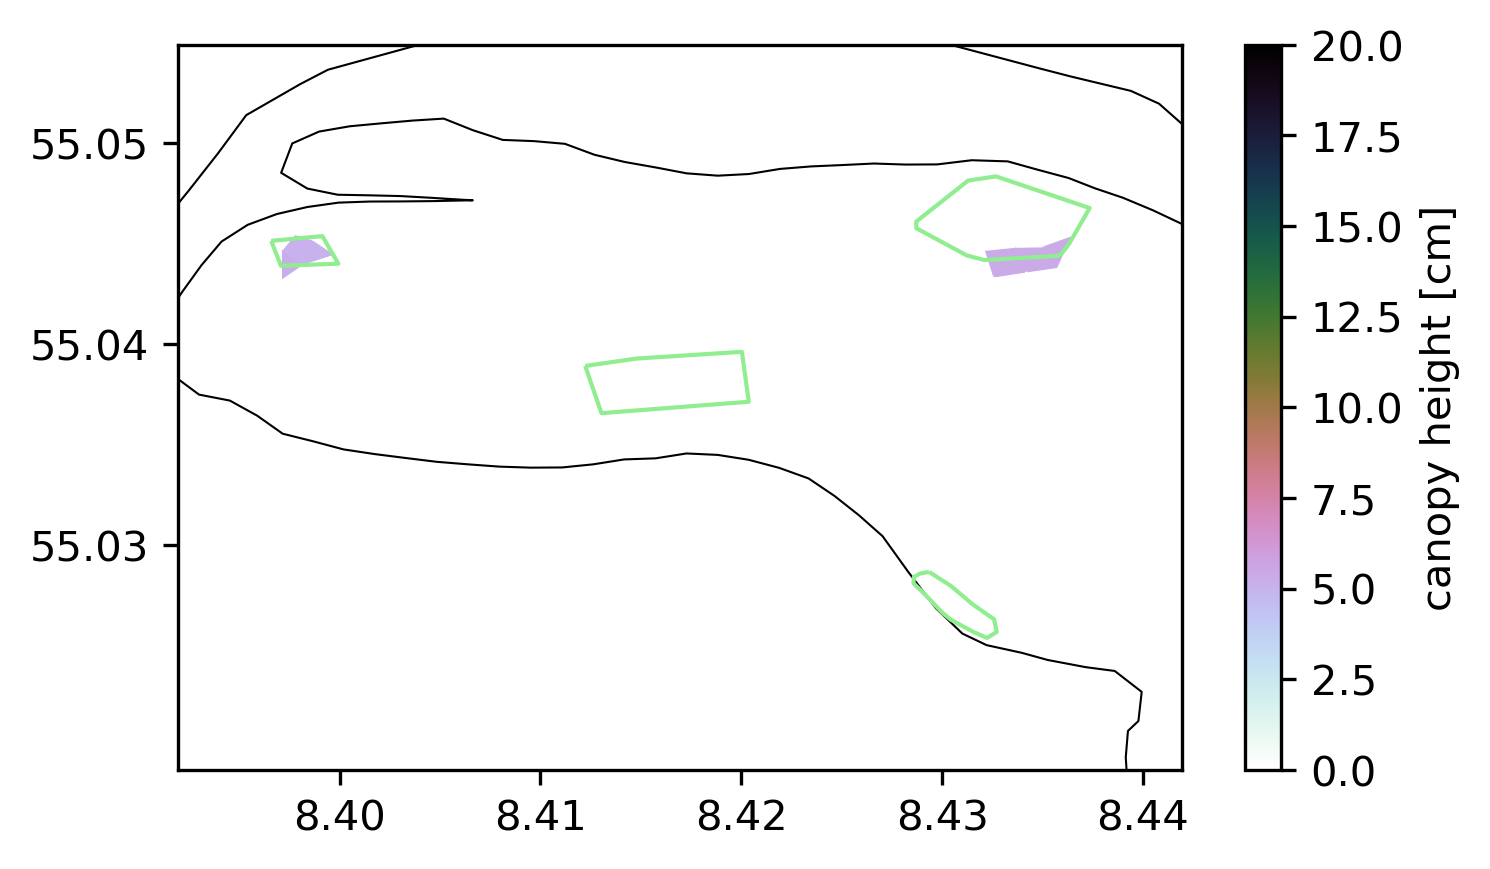

In [5]:
dx = 0.025
fig = plt.figure(figsize=(5,3))

plt.tripcolor(x, y, tri, hcan_mean, cmap='cubehelix_r',edgecolors='face',vmax = 20)#,facecolors='none')
cbar = plt.colorbar()
bay = gpd.read_file(shp_pat)
bay.boundary.plot(ax=plt.gca(),color='k',linewidth=0.5)

for meadow,shape,center in zip(meadows,shapes,centers):
    shape.boundary.plot(ax=plt.gca(),color='lightgreen',linewidth=1)
    #plt.xlabel('x [km]')
    #plt.ylabel('y [km]')
    plt.axis('equal')
    plt.yticks([55.03,55.04,55.05])

    cbar.set_label('canopy height [cm]')
    #plt.title(meadow)
    
    #plt.quiver(x,y,x_mean,y_mean,width=0.005,zorder=6,scale=35,scale_units='xy')
    plt.xlim(center[0]+[-dx,dx])
    plt.ylim(center[1]+[-dx/2,dx/2])
    plt.tight_layout()
    plt.savefig(outpath + 'mean_canopy_heigt_'+mon_str+'_'+meadow+'.png')

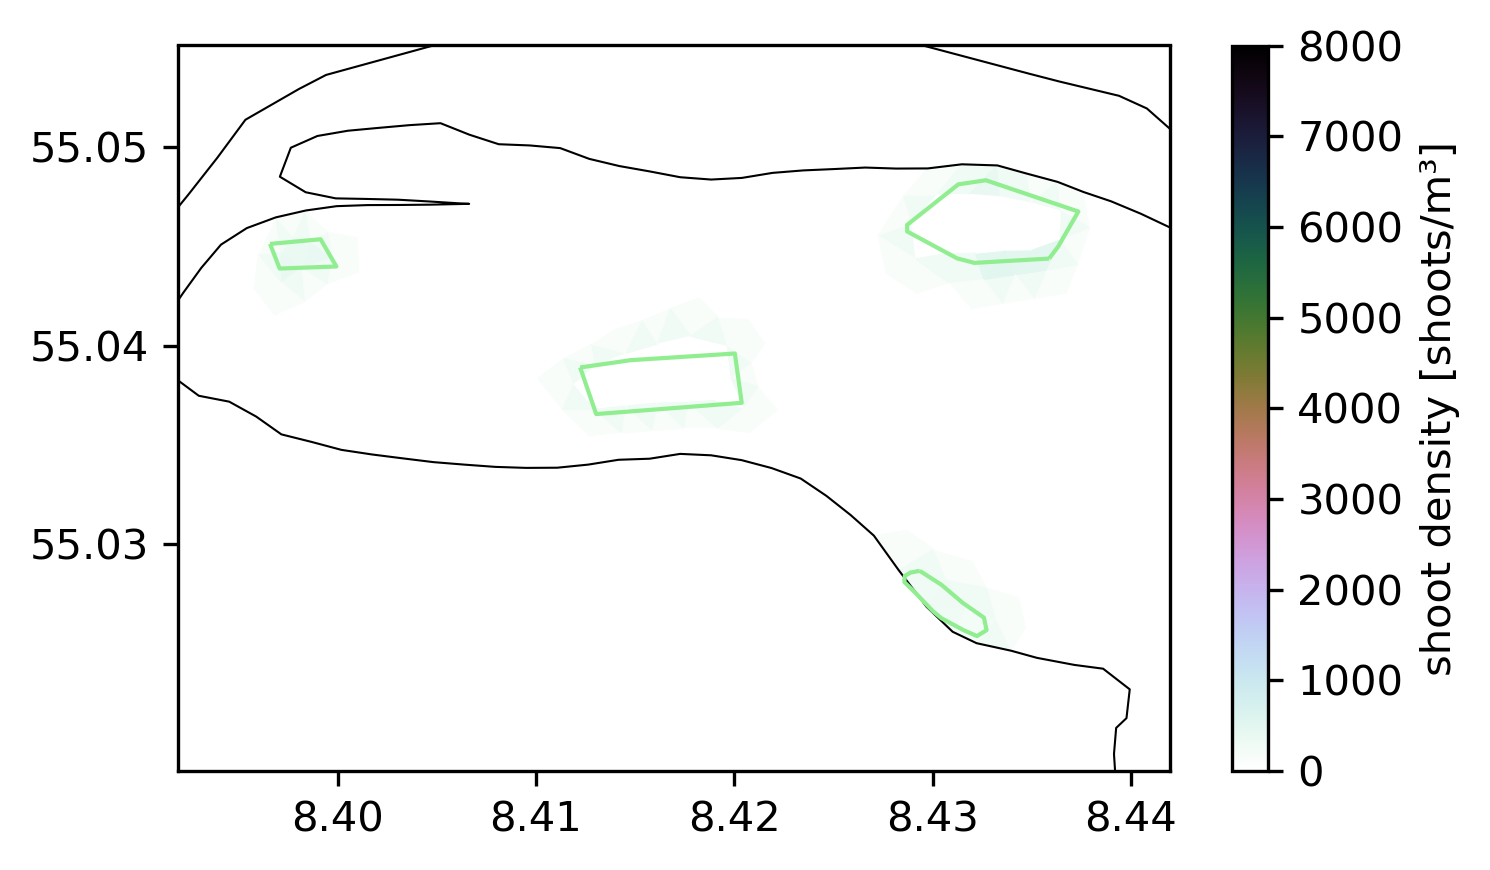

In [6]:
dx = 0.025
fig = plt.figure(figsize=(5,3))

plt.tripcolor(x, y, tri, dens_mean, cmap='cubehelix_r',edgecolors='face',vmax = 8000)#,facecolors='none')
cbar = plt.colorbar()
bay = gpd.read_file(shp_pat)
bay.boundary.plot(ax=plt.gca(),color='k',linewidth=0.5)

for meadow,shape,center in zip(meadows,shapes,centers):
    shape.boundary.plot(ax=plt.gca(),color='lightgreen',linewidth=1)
    #plt.xlabel('x [km]')
    #plt.ylabel('y [km]')
    plt.axis('equal')
    plt.yticks([55.03,55.04,55.05])

    cbar.set_label('shoot density [shoots/m³]')
    #plt.title(meadow)
    
    #plt.quiver(x,y,x_mean,y_mean,width=0.005,zorder=6,scale=35,scale_units='xy')
    plt.xlim(center[0]+[-dx,dx])
    plt.ylim(center[1]+[-dx/2,dx/2])
    plt.tight_layout()
    plt.savefig(outpath + 'mean_shoot_density_'+mon_str+'_'+meadow+'.png')